In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from functools import partial

from keras.layers import *
from keras.models import *
from keras.datasets import mnist
from keras.optimizers import Adam, RMSprop
import keras.backend as K

In [35]:
from cv2 import imread

In [6]:
import os
import glob

In [29]:
# prepare data first
data_dir = '../data/images/'
data_dir_arr = glob.glob(os.path.join(data_dir, '*.png'))
data_jpg_arr = glob.glob(os.path.join(data_dir, '*.jpg')) # this is gen 7 anyways don't need this trash
print(len(data_dir_arr))
data_dir_arr[:3]

721


['../data/images/metang.png',
 '../data/images/heliolisk.png',
 '../data/images/makuhita.png']

In [34]:
test_img = np.array(Image.open(data_dir_arr[3]))
test_img.shape

(120, 120, 4)

In [37]:
og_data = []
for image_path in data_dir_arr:
    img = imread(image_path)
    og_data.append(np.array(img))
    print(og_data[-1].shape[2:])
og_data = np.asarray(og_data)

(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)


In [ ]:
for image in og_data:
    new_image = np.zeros(128, 128, 4)

In [38]:
og_data[:1]

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]]], dtype=uint8)

In [39]:
og_data[3].shape

(120, 120, 3)

ValueError: 'RGB' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

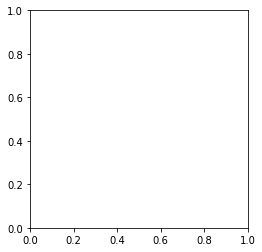

In [41]:
plt.imshow(og_data[3], cmap='RGB')

In [44]:
test_data = og_data[:, :, :, ::-1]

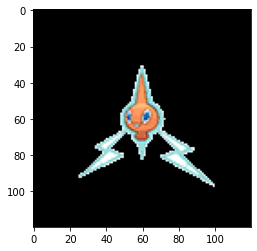

In [46]:
plt.imshow(test_data[3, :,:,:])

In [48]:
og_data[0].shape

(120, 120, 3)

In [49]:
test_data[0].shape

(120, 120, 3)

In [51]:
reshaped_data = test_data.transpose(0, 3, 1, 2)
reshaped_data.shape

(721, 3, 120, 120)

In [52]:
np.max(test_data)

255

In [53]:
batch_size = 64
iterations = 50000

d_loss = []
g_loss = []
gp_loss = []

x_train = og_data.copy()
x_train = x_train.astype('float32') / 255.0 # normalize

In [15]:
def r1_gradient_penalty(y_true, y_pred, samples):
    # get gradients of the discriminator result from samples
    gradients = K.gradients(y_pred, samples)[0] # only grab first layers
    
    # get norm squared
    gradients_sqr = K.square(gradients)
    # the axis choice ensures each image has their own unique norm value
    gradient_norm = K.sum(gradients_sqr, axis = [1, 2, 3])
    
    # average norm over batch
    return K.mean(gradient_norm)

In [59]:
def AdaIN(x):
    # normalize x[0] (image representation)
    mean = K.mean(x[0], axis = [0, 1], keepdims = True)
    std = K.std(x[0], axis = [0, 1], keepdims = True)
    y = (x[0] - mean) / std
    
    # reshape scale and bias parameters
    pool_shape = [-1, 1, 1, y.shape[-1]]
    scale = K.reshape(x[1], pool_shape)
    bias = K.reshape(x[2], pool_shape)
    
    # multiply by x[1] (gamma) and add x[2] (beta)
    return y * scale + bias

In [56]:
def g_block(input_tensor, latent_vector, filters):
    gamma = Dense(filters)(latent_vector)
    beta = Dense(filters)(latent_vector)
    
    out = UpSampling2D()(input_tensor)
    out = Conv2D(filters, 3, padding='same')(out)
    out = Lambda(AdaIN)([out, gamma, beta])
    out = Activation('relu')(out)
    
    return out

In [57]:
def d_block(input_tensor, filters):
    out = Conv2D(filters, 3, padding='same')(input_tensor)
    out = LeakyReLU(0.2)(out)
    out = AveragePooling2D()(out)
    
    return out

In [61]:
latent_input = Input([64])

"""
latent mapping network. this is a bunch of FC layers to change latent input into a vector we can use
make the features in the latent vector correspond to features in latent channels
but latent input is completely random
e.g. latent input suggests a feature for snow and cactus, learns to disentangle these contradictory things
"""

# map latent input
latent = Dense(64, activation='relu')(latent_input)
latent = Dense(64, activation='relu')(latent)
latent = Dense(64, activation='relu')(latent)

# reshape to 4x4x64 (stylegan for ffhq uses 4x4x512)
x = Dense(4*4*64, activation = 'relu')(latent_input)
x = Reshape([4, 4, 64])(x)

# 4x4x64
x = g_block(x, latent, 64)

# 8x8x64
x = g_block(x, latent, 32)

# 16x16x32
x = g_block(x, latent, 16)

# 32x32x16
x = g_block(x, latent, 8)

# 64x64x8
x = g_block(x, latent, 8)

# size: 128x128x8, make rgb with values between 0 & 1
image_output = Conv2D(3, 1, padding = 'same', activation='sigmoid')(x)

generator = Model(inputs=latent_input, outputs=image_output)

generator.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 64)           0                                            
__________________________________________________________________________________________________
dense_22 (Dense)                (None, 1024)         66560       input_3[0][0]                    
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 64)           4160        input_3[0][0]                    
__________________________________________________________________________________________________
reshape_3 (Reshape)             (None, 4, 4, 64)     0           dense_22[0][0]                   
____________________________________________________________________________________________

In [ ]:
# discriminator input
img_input = Input([128, 128, 3])